In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [1]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [2]:
y.shape, tx.shape

((10000,), (10000, 2))

In [12]:
w = np.array([73.293922  , 13.47971243])
1/2/y.shape[0] * np.sum((y - tx@w)**2, axis=0)

15.385887868829402

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
#i Each column of X represents a different feature of each input (i.e. column dimension represents D)
#ii Each row of X represents all the different data samples available
#iii We have 1s in X in order to be able to add an offset to the regression (as our w vector comprises [w0, w1])
#iv 3 people implies 3 samples, size of y would be (3,1) and X would be (3,2) (height and weight features)
#v Error vector given as e = y - Xw, so MSE can be written as mse = 1/(2*N) * e.transpose()@e

In [5]:
test = (y[..., np.newaxis] - tx@np.array([[1], [2]]))
test_sq = (y[..., np.newaxis] - tx@np.array([[1], [2]]))**2
print(test[:5], '\n\n', test_sq[:5])

[[104.9315547 ]
 [ 71.43388117]
 [ 91.55946151]
 [ 96.11116059]
 [ 90.85596808]] 

 [[11010.63117124]
 [ 5102.79937868]
 [ 8383.13499166]
 [ 9237.35518965]
 [ 8254.80693616]]


In [7]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    return 1/2/y.shape[0] * np.sum((y - tx@w)**2, axis=0)

# 2 Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([w0[i], w1[j]])
            losses[i, j] = (compute_loss(y, tx, w))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.153 seconds


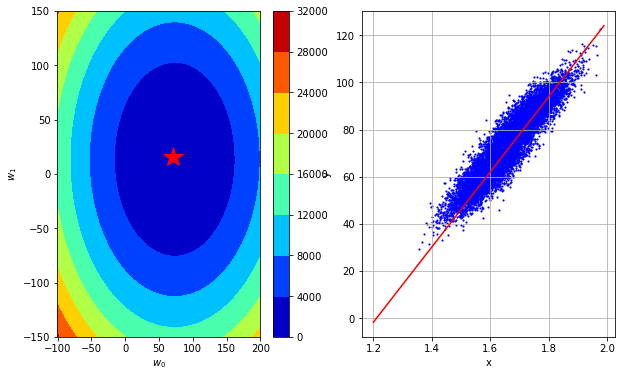

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [9]:
# b) The original estimate using 10 intervals produced a much higher loss value than when increasing the number of 
# intervals. The regression line (red), which represents the model, seems to not perform so well as it does not really
# follow the general trend of the sample data (scattered around in the blue dots). 

#Increasing the size of the grid search allows for a much better representation of the data, as the regression line 
# now appears to follow the trend more closely.

# The MSE contour plot (on the left) is not smooth for more coarse grid searches due to the fact that untested model
# configurations have to be interpolated on the basis of tested ones. When we refine the grid, we see smoother curves.


# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    return -1/y.shape[0] * tx.transpose() @ (y - tx @ w)

In [11]:
error = (y-tx@np.array([1,2]))
grad = tx.transpose() @ error
grad = -1/y.shape[0] * grad
w = np.array([1,2])
update = w - 0.7 * grad

In [12]:
# Norm of the gradient vector tells us the steepness at a given point in the cost function. Generally areas with lower
# gradient norms tend to be closer to an optimum, i.e. the steeper the gradient, the further we are from the optimum.

Please fill in the functions `gradient_descent` below:

In [13]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # TODO: compute gradient and loss
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        # TODO: update w by gradient
        w = w - gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [14]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1170.9958457177693, w0=97.32939220021052, w1=10.347971243498906
Gradient Descent(1/49): loss=1080.9616047267068, w0=94.92584518039999, w1=10.661145362647927
Gradient Descent(2/49): loss=1003.3307429339492, w0=92.76265286257052, w1=10.943002069882043
Gradient Descent(3/49): loss=936.2169309508135, w0=90.81577977652398, w1=11.196673106392744
Gradient Descent(4/49): loss=878.0452107065706, w0=89.0635939990821, w1=11.424977039252376
Gradient Descent(5/49): loss=827.4975380246261, w0=87.48662679938441, w1=11.630450578826045
Gradient Descent(6/49): loss=783.4682017965464, w0=86.06735631965648, w1=11.815376764442346
Gradient Descent(7/49): loss=745.0272902316686, w0=84.79001288790136, w1=11.981810331497018
Gradient Descent(8/49): loss=711.3907175660061, w0=83.64040379932173, w1=12.131600541846224
Gradient Descent(9/49): loss=681.8956028385142, w0=82.60575561960007, w1=12.266411731160508
Gradient Descent(10/49): loss=655.9800181277682, w0=81.67457225785058, w1=12.3

In [15]:
# With the default settings (i.e. gamma = 0.7 and w_init = [0, 0]) we see that the algorithm does not converge. 
# The learning rate is too large and leads to the cost not being minimized. It is not converging at all either, but it
# seems to get stuck at the configuration w =[73.29, 13.479]

# If we lower the learning rate, we observe a more steady convergence, although very slow. It is thus a question of 
# finding a good balance between stability and speed of convergence. 

# With the higher learning rates we see that it jumps down very quick (although not necessarily reaching the minimum
# loss value, which I think is around 200), but then bounces back up and the loss reaches 899 (this holds for 
# gamma=0.5 and 0.7). This could mean that it reaches one local minimum but then due to the learning rate it jumps to
# another one and gets stuck there.

# Even with different initializations it seems the model converges.

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [5]:
from helpers import batch_iter
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    
    #batch_iter also has 'num_batches' and 'shuffle' arguments, with default 1 and True respectively
#     _y, _tx = next(batch_iter(y, tx, batch_size = 10))
    
    sgd =  -1/y.shape[0] * tx.transpose() @ (y - tx @ w)
    
    return sgd


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # TODO: implement stochastic gradient descent.
    
    losses = []
    ws = []
    
    w = initial_w
    
    for i, (batch_y, batch_tx) in enumerate(batch_iter(y, tx, batch_size = batch_size, num_batches = max_iters)):
        grad = compute_stoch_gradient(batch_y, batch_tx, w)
        loss = compute_loss(batch_y, batch_tx, w)
        
        w = w - gamma*grad
        
        losses.append(loss)
        ws.append(w)
        
#         print(f'Gradient Descent ({i}/{max_iters-1}): loss={loss}, w0={w[0]}, w1={w[1]}')
    
    return losses, ws

In [18]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.005 seconds


In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


loss:13.132296289150226 loss_outlier:20.2174213095809


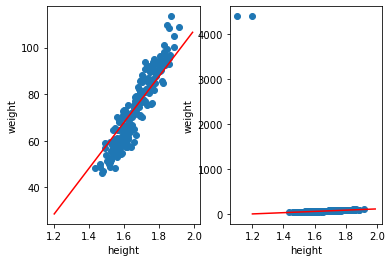

In [12]:
import matplotlib.pyplot as plt
from plots import prediction

height, weight, gender = load_data(sub_sample=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

losses, ws = stochastic_gradient_descent(y, tx, initial_w=np.array([10,10]), 
                                           batch_size=4, max_iters=50, gamma=0.7)

w = ws[losses.index(min(losses))]

_height, _weight, _gender = load_data(sub_sample=True, add_outlier=True)
_x, _mean_x, _std_x = standardize(_height)
_y, _tx = build_model_data(_x, _weight)

_losses, _ws = stochastic_gradient_descent(_y, _tx, initial_w=np.array([10,10]), 
                                           batch_size=4, max_iters=50, gamma=0.7)

_w = _ws[_losses.index(min(_losses))]

plt.figure()

ax1 = plt.subplot(121)
ax1.scatter(height, weight)
x1, f1 = prediction(w[0], w[1], mean_x, std_x)
ax1.plot(x1, f1, 'r')
plt.xlabel('height')
plt.ylabel('weight')

ax2 = plt.subplot(122)
ax2.scatter(_height, _weight)
x2, f2 = prediction(_w[0], _w[1], _mean_x, _std_x)
ax2.plot(x2, f2, 'r')
plt.xlabel('height')
plt.ylabel('weight')

print(f'loss:{min(losses)}', f'loss_outlier:{min(_losses)}')

In [25]:
_losses[-1]

9.421440919426923

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)